In [1]:
import os, sys
import numpy as np
import healpy as hp
import pandas as pd
import h5py
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

os.system('module load texlive/2022')

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times",
    "font.size"  : 13
})

matplotlib.rcParams.update({'font.size': 15})

matplotlib.rcParams['mathtext.fontset'] = 'stix'
plt.rc('text.latex', preamble=r'\usepackage{/global/cfs/cdirs/lsst/groups/WL/users/yomori/repo/nulltests_txpipe/apjfonts}')
        
#plt.rcParams["font.family"] = "Times New Roman"

plt.rcParams['axes.facecolor']   = 'w'
plt.rcParams['figure.facecolor'] = 'w'


Lmod has detected the following error: The following module(s) are unknown:
"texlive/2022"

Please check the spelling or version number. Also try "module spider ..."
It is also possible your cache file is out-of-date; it may help to try:
  $ module --ignore_cache load "texlive/2022"

Also make sure that all modulefiles written in TCL start with the string
#%Module





In [2]:
#/home/shrihan/weaklens/gaia_match_psf/gaia_match_psf_code/results/iband/DES_MATCH_BANDi.csv
#/home/shrihan/weaklens/gaia_match_psf/gaia_match_psf_code/results/iband_hscy3/HSCY3_MATCH_BANDi.csv
#/home/shrihan/weaklens/gaia_match_psf/gaia_match_psf_code/results/rband_kids/KIDS_MATCH_BANDr.csv

hsc_path = "/global/homes/j/jjeffers/HSCY3_MATCH_BANDi.csv"
kids_path = "/global/homes/j/jjeffers/KIDS_MATCH_BANDr.csv"
des_path = "/global/homes/j/jjeffers/DES_MATCH_BANDi.csv"

master_comb_df_hsc = pd.read_csv(hsc_path)
master_comb_df_kids = pd.read_csv(kids_path)
master_comb_df_des = pd.read_csv(des_path)

/tmp/ipykernel_1749215/471288160.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_yticklabels(['0','1','2','3','4'])  # Remove ytick labels


<Figure size 640x480 with 0 Axes>

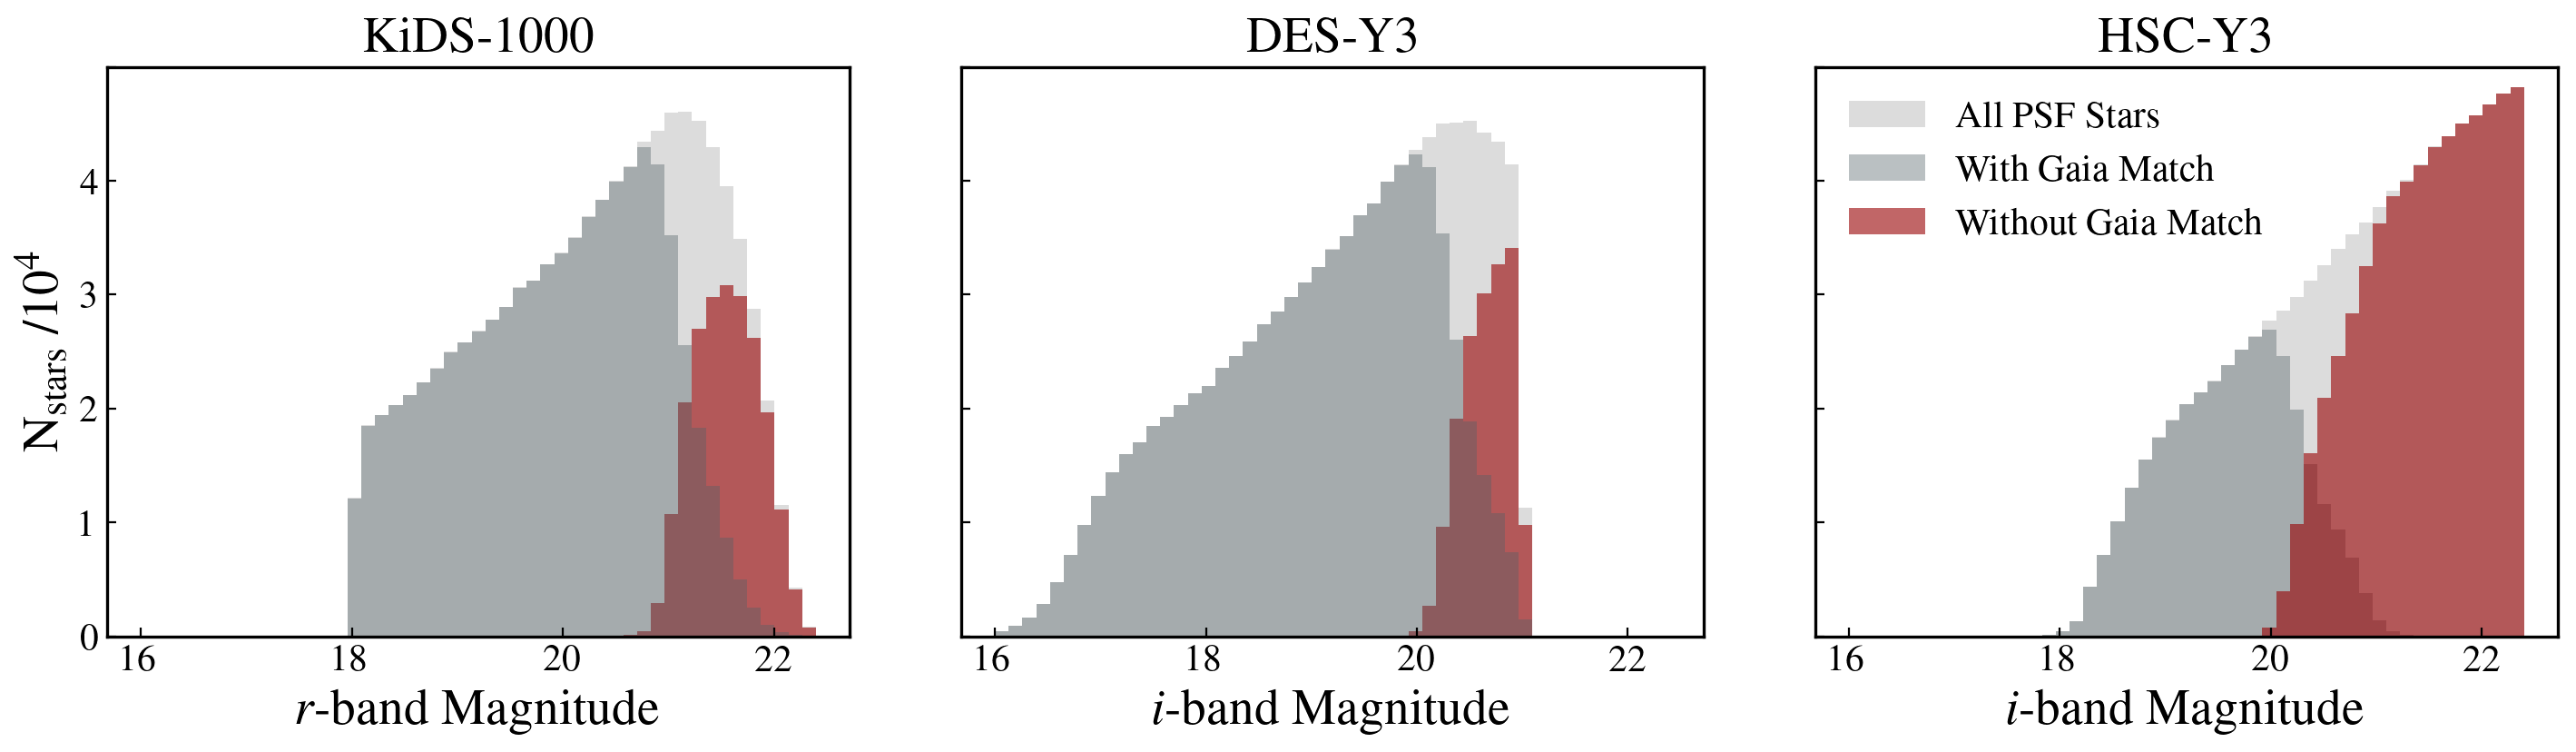

In [15]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

matplotlib.rcParams.update({'font.size': 13})

plt.clf()

allcol = 'gainsboro'
nmcol = 'xkcd:blood red'
mcol = 'xkcd:gunmetal'

#fig, axes = plt.subplots(1, 3, figsize=(15, 3.5))

fig = plt.figure(figsize=(13.5,3.3),dpi=100)
gs  = gridspec.GridSpec(1, 3, top=0.95, right=1.00, left=0.00, bottom=0.00,hspace=0.05,wspace=0.15)

min, max = master_comb_df_kids["mag0"].min(), master_comb_df_kids["mag0"].max()
common_bin = np.linspace(16, 22.4, 50)
''
# Plot for master_comb_df_kids
match_idx_kids = (master_comb_df_kids["matched"] == 1)
super_match_idx_kids = (master_comb_df_kids[match_idx_kids]["non_single_star"] == 0) & (master_comb_df_kids[match_idx_kids]["in_galaxy_candidates"] == False)
ax0 = plt.subplot(gs[0])
ax0.hist(master_comb_df_kids["mag0"], bins=common_bin, label="All PSF Stars",histtype='stepfilled', color=allcol)
ax0.hist(master_comb_df_kids["mag0"][~match_idx_kids], bins=common_bin,histtype='stepfilled', label="Without Gaia Match", alpha=0.6, color=nmcol)
ax0.hist(master_comb_df_kids["mag0"][match_idx_kids][super_match_idx_kids],histtype='stepfilled', bins=common_bin, label="With Gaia Match", alpha=0.4, color=mcol)
ax0.set_title('KiDS-1000', fontsize=20)

ax0.set_xlabel(r'$r$-band Magnitude', fontsize=20)
ax0.set_ylabel(r"N$_{\rm stars}$ /$10^4$", fontsize=20)
ax0.tick_params(axis='both', which='both',direction='in', labelsize=15)
ax0.locator_params(axis='x', nbins=5)
ax0.locator_params(axis='y', nbins=5)
#ax0.set_yticks([])  # Remove ytick labels
ax0.set_yticklabels(['0','1','2','3','4'])  # Remove ytick labels
ax0.set_ylim(0, 50000)
#ax0.ticklabel_format(useMathText=True)


# Plot for master_comb_df_des
match_idx_des = (master_comb_df_des["matched"] == 1)
super_match_idx_des = (master_comb_df_des[match_idx_des]["non_single_star"] == 0) & (master_comb_df_des[match_idx_des]["in_galaxy_candidates"] == False)

ax1 = plt.subplot(gs[1])
ax1.hist(master_comb_df_des["mag0"], bins=common_bin,histtype='stepfilled', label="All PSF Stars", color=allcol)
ax1.hist(master_comb_df_des["mag0"][~match_idx_des], bins=common_bin,histtype='stepfilled', label="Without Gaia Match", alpha=0.6, color=nmcol)
ax1.hist(master_comb_df_des["mag0"][match_idx_des][super_match_idx_des],histtype='stepfilled', bins=common_bin, label="With Gaia Match", alpha=0.4, color=mcol)
ax1.set_title(r'DES-Y3', fontsize=20)
ax1.set_xlabel(r'$i$-band Magnitude', fontsize=20)
ax1.tick_params(axis='both', which='both',direction='in', labelsize=15)
ax1.locator_params(axis='x', nbins=5)
ax1.locator_params(axis='y', nbins=5)
#ax1.set_yticks([]) 
ax1.set_yticklabels([]) 
ax1.set_ylim(0, 50000)



# Plot for master_comb_df_hsc
match_idx_hsc = (master_comb_df_hsc["matched"] == 1)
super_match_idx_hsc = (master_comb_df_hsc[match_idx_hsc]["non_single_star"] == 0) & (master_comb_df_hsc[match_idx_hsc]["in_galaxy_candidates"] == False)

ax2 = plt.subplot(gs[2])
ax2.hist(master_comb_df_hsc["mag0"], bins=common_bin,histtype='stepfilled', label="All PSF Stars", color=allcol)
ax2.hist(master_comb_df_hsc["mag0"][match_idx_hsc][super_match_idx_hsc],histtype='stepfilled', bins=common_bin, label="With Gaia Match", alpha=0.4, color=mcol)
ax2.hist(master_comb_df_hsc["mag0"][~match_idx_hsc], bins=common_bin,histtype='stepfilled', label="Without Gaia Match", alpha=0.6, color=nmcol)

ax2.set_title(r'HSC-Y3', fontsize=20)
ax2.set_xlabel(r'$i$-band Magnitude', fontsize=20)
ax2.tick_params(axis='both', which='both',direction='in', labelsize=15)
ax2.locator_params(axis='x', nbins=5)
ax2.locator_params(axis='y', nbins=5)
#ax2.set_yticks([]) 
ax2.set_yticklabels([])  
ax2.set_ylim(0, 50000)
ax2.legend(frameon=False,fontsize = 15,)
ax2.tick_params(axis="both",which='both',direction="in")

for axis in ['top','bottom','left','right']:
    ax0.spines[axis].set_linewidth(1.2)
    ax1.spines[axis].set_linewidth(1.2)
    ax2.spines[axis].set_linewidth(1.2)

plt.savefig("psf_gaia_match_v2.pdf", dpi=200,bbox_inches='tight')


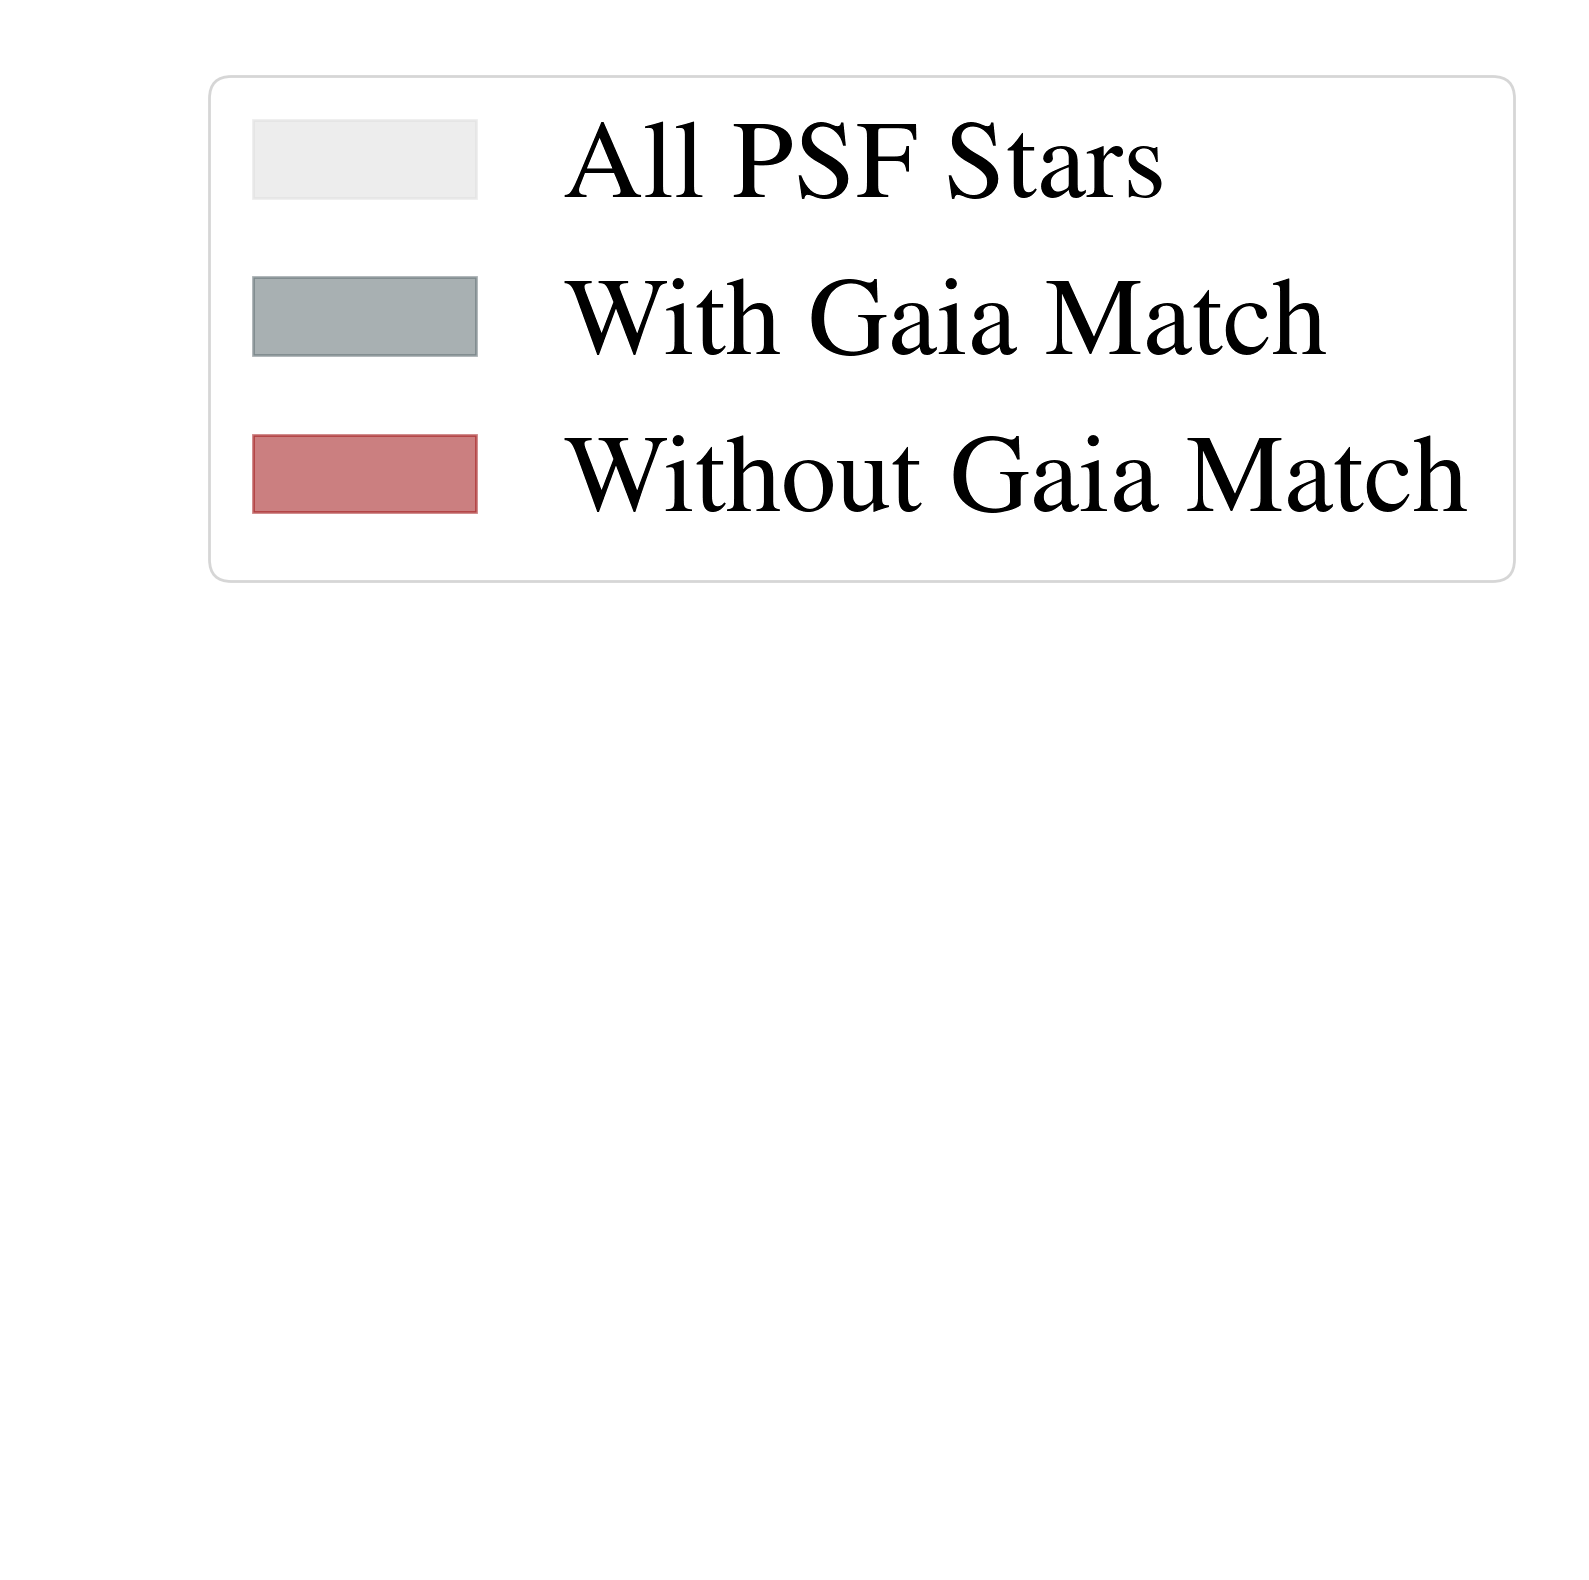

In [41]:
# High-res label if we want to combine in overleaf rather than matplotlib

import matplotlib.patches as mpatches

plt.figure(figsize = (10, 10))
plt.axis('off')

# Create empty patches
all_stars_patch = mpatches.Patch(color=allcol, label='All PSF Stars', alpha=0.5)
with_match_patch = mpatches.Patch(color=mcol, label='With Gaia Match', alpha=0.5)
without_match_patch = mpatches.Patch(color=nmcol, label='Without Gaia Match', alpha=0.5)

# Create legend with the patches
plt.legend(handles=[all_stars_patch, with_match_patch, without_match_patch], fontsize = 40)
plt.savefig("legend.png", dpi=400, transparent=True)